<a href="https://colab.research.google.com/github/SanjayMahajan1/Tensorflow/blob/master/Copy_of_NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-08-15 14:10:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 2607:f8b0:4001:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-15 14:10:09 (120 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20,return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(20))
model.add(Dense(total_words,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 64)            205504    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 10, 40)            13600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 40)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 20)                4880      
_________________________________________________________________
dense (Dense)                (None, 3211)              67431     
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              10313732  
Total params: 10,605,147
Trainable params: 10,605,147
Non-trainable params: 0
__________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

W0815 14:33:15.235877 139754507401088 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.9017 - acc: 0.0221
Epoch 2/100
15462/15462 [==============================] - 27s 2ms/sample - loss: 6.5140 - acc: 0.0244
Epoch 3/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.4007 - acc: 0.0288
Epoch 4/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.3022 - acc: 0.0336
Epoch 5/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.2231 - acc: 0.0378
Epoch 6/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.1315 - acc: 0.0395
Epoch 7/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.0433 - acc: 0.0459
Epoch 8/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 5.9568 - acc: 0.0479
Epoch 9/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 5.8588 - acc: 0.0521
Epoch 10/100
15462/15462 [==============================] - 26s 2ms/sampl

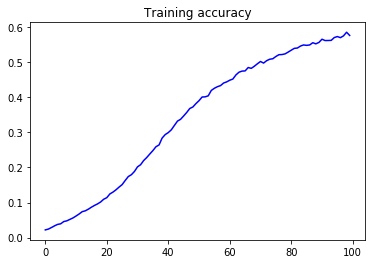

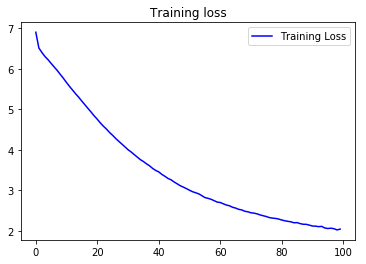

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope my pain be be alone alone that which thou thou music music been indeed deformed'st nearly dying dignified anew to spies spies sheaves flowers exchanged frailer spies behind a spring might crowned sit stand check my sweets in having thy pain too view die be know be canst thee near good lesson one brain so wrong anew clearer another youth back with back up women's broke to grow admiring tell her stain pays clearer to triumph lies must grow worse virtuous greater bars what see barren of imprison'd pride dead fashion doth something some taken thee bear amiss thee son
